In [13]:
# Collaborative Filtering for GitHub Project Partner Recommendation

import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Load cleaned dataset (assumed to be available)
df = pd.read_csv("../data/cleaned_github_users.csv")

# Select interaction-related features
interaction_features = df[['Public_Repos', 'Followers', 'Following']].copy()

# Normalize the interaction features
scaler = MinMaxScaler()
interaction_scaled = scaler.fit_transform(interaction_features)

# Compute user-user similarity matrix
similarity_matrix_cf = cosine_similarity(interaction_scaled)

# Function: Collaborative Filtering Recommendation
def recommend_collaborators(username, top_k=5, preferred_location=None):
    if username not in df['Username'].values:
        print("❌ Username not found.")
        return pd.DataFrame()

    idx = df.index[df['Username'] == username][0]
    similarities = similarity_matrix_cf[idx]
    similar_indices = similarities.argsort()[::-1][1:top_k+10]  # buffer for filtering

    recommendations = df.iloc[similar_indices].copy()
    recommendations['similarity'] = similarities[similar_indices]

    if preferred_location:
        recommendations = recommendations[
            recommendations['Location'].str.contains(preferred_location, case=False, na=False)
        ]

    result =  recommendations[['Username', 'Followers', 'Following', 'Public_Repos', 'Location', 'Profile_URL', 'similarity']].head(top_k)
    result.to_csv("../data/collab_recommendations.csv", index=False)
    print("✅ Saved collaborative recommendations to: data/collab_recommendations.csv")

    return result

# Example usage
recs = recommend_collaborators("abhay", top_k=5)
print("\n🔍 Collaborative Recommendations:\n")
print(recs)


✅ Saved collaborative recommendations to: data/collab_recommendations.csv

🔍 Collaborative Recommendations:

            Username  Followers  Following  Public_Repos  \
60             abhay   0.005697   0.000190      0.023877   
1634          gojomo   0.004211   0.000190      0.017624   
2769       andycroll   0.003902   0.000000      0.016487   
610   martinjandrews   0.001239   0.000000      0.005117   
3532         AArnott   0.039046   0.001517      0.157476   

                  Location                        Profile_URL  similarity  
60       San Francisco, CA           https://github.com/abhay    1.000000  
1634         San Francisco          https://github.com/gojomo    0.999996  
2769          Brighton, UK       https://github.com/andycroll    0.999968  
610   Melbourne, Australia  https://github.com/martinjandrews    0.999965  
3532         Longmont, CO          https://github.com/AArnott    0.999960  


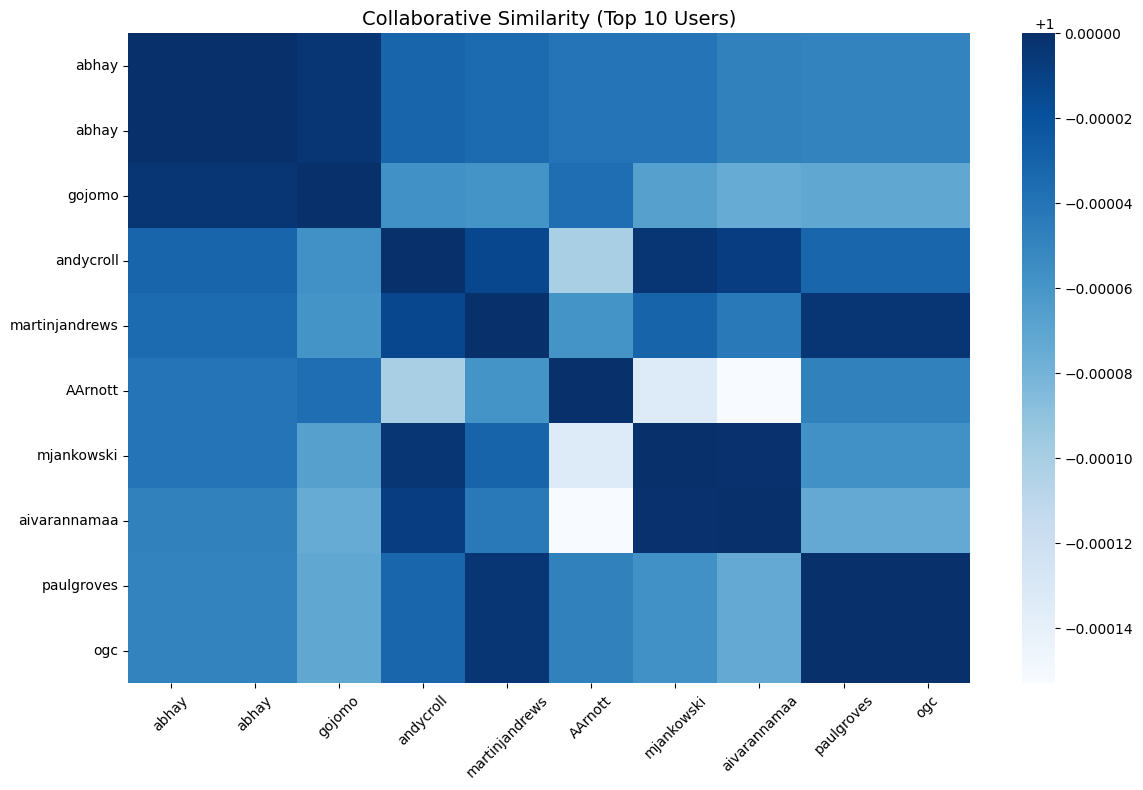

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Take top 20 users for better visualization
top_users_idx = np.argsort(similarity_matrix_cf[df.index[df['Username'] == "abhay"][0]])[::-1][:10]
top_users = df.iloc[top_users_idx]['Username'].values
top_sim_matrix = similarity_matrix_cf[top_users_idx][:, top_users_idx]

plt.figure(figsize=(12, 8))
sns.heatmap(top_sim_matrix, xticklabels=top_users, yticklabels=top_users, cmap="Blues", annot=False)
plt.title("Collaborative Similarity (Top 10 Users)", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



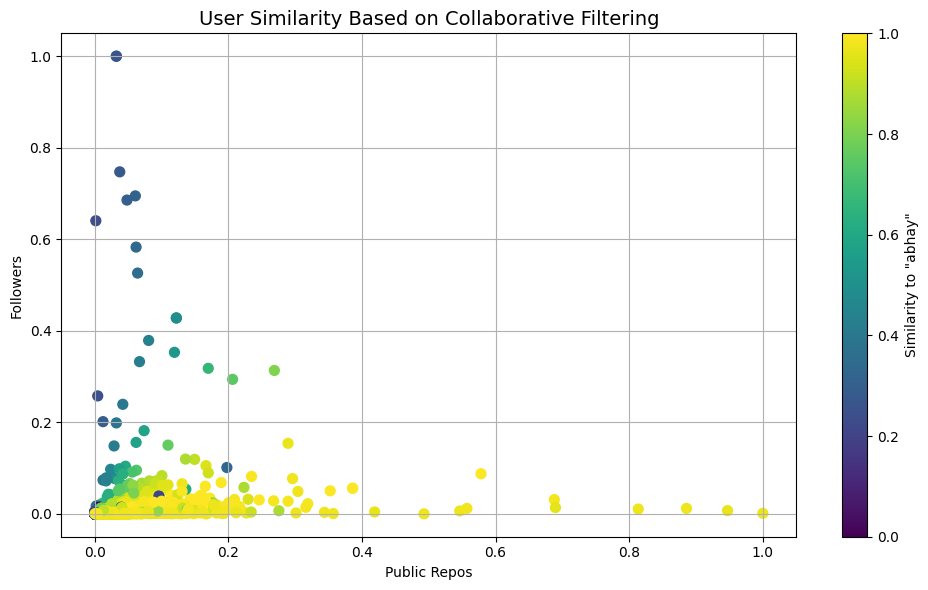

In [15]:
# Pull the similarity values with respect to target user
target_idx = df.index[df['Username'] == "abhay"][0]
similarities = similarity_matrix_cf[target_idx]

plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Public_Repos'], df['Followers'], c=similarities, cmap='viridis', s=50)
plt.colorbar(scatter, label='Similarity to "abhay"')
plt.xlabel("Public Repos")
plt.ylabel("Followers")
plt.title("User Similarity Based on Collaborative Filtering", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


In [17]:
all_scores = []

for username in df['Username'].unique():
    idx = df.index[df['Username'] == username][0]
    similarities = similarity_matrix_cf[idx]  # <-- corrected name

    temp_df = pd.DataFrame({
        'Target_Username': username,
        'Username': df['Username'],
        'collab_score': similarities
    })
    all_scores.append(temp_df)

# Concatenate all scores
all_scores_df = pd.concat(all_scores, ignore_index=True)
all_scores_df.to_csv("../data/all_collab_scores.csv", index=False)
print("✅ Saved collaborative scores for all users.")


✅ Saved collaborative scores for all users.
